In [42]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [43]:
import zipfile
with zipfile.ZipFile('../content/creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('../content/')

In [44]:
data=pd.read_csv('../content/creditcard.csv')

In [45]:
data.shape

(284807, 31)

In [46]:
X = data.loc[:, data.columns != 'Class']
Y = data.Class

In [47]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_SM, Y_SM = smote.fit_resample(X, Y)

In [48]:
print(X_SM.shape,Y_SM.shape)

(568630, 30) (568630,)


In [49]:
data_SM = pd.concat([X_SM, Y_SM], axis=1)
print(data_SM.shape)
print(data_SM.groupby('Class').size())

(568630, 31)
Class
0    284315
1    284315
dtype: int64


0    284315
1    284315
Name: Class, dtype: int64


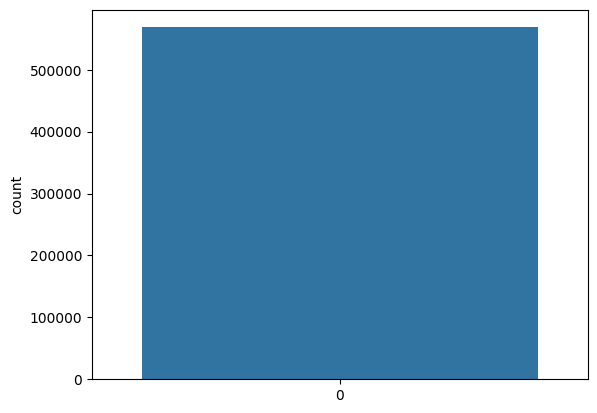

In [50]:
#Fradulent/ Non-Fradulent Samples Plot
y = data_SM["Class"]
sns.countplot(y)
target_temp = data_SM.Class.value_counts()
print(target_temp)

In [10]:
data_SM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [11]:
data_SM.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,87794.875173,-2.478320,1.913414,-3.649410,2.329081,-1.629455,-0.720250,-2.926683,0.283592,-1.330592,...,0.396653,-0.008643,-0.005739,-0.054255,0.026514,0.028363,0.080798,0.041724,95.742985,0.5
std,48137.756660,5.446285,3.630037,6.148374,3.143478,4.133528,1.705718,5.700196,4.933836,2.224608,...,2.829707,1.159355,1.016057,0.540182,0.613508,0.447507,0.950813,0.418061,220.685098,0.5
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,45955.627847,-3.066713,-0.098044,-5.238260,-0.054827,-1.825535,-1.556476,-3.254681,-0.197604,-2.325940,...,-0.157523,-0.499121,-0.224355,-0.383876,-0.302876,-0.267113,-0.067814,-0.057180,3.370520,0.0
50%,80314.000000,-0.820744,1.017694,-1.555439,1.485019,-0.444074,-0.694579,-0.754413,0.169198,-0.808729,...,0.162086,0.020320,-0.026894,-0.007672,0.044342,-0.006437,0.058242,0.036835,25.000000,0.5
75%,134665.000000,0.825534,2.891819,0.266499,4.348198,0.429872,0.023005,0.186439,0.854459,0.079539,...,0.651009,0.526725,0.187065,0.340979,0.368168,0.307982,0.433624,0.214167,99.990000,1.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.0


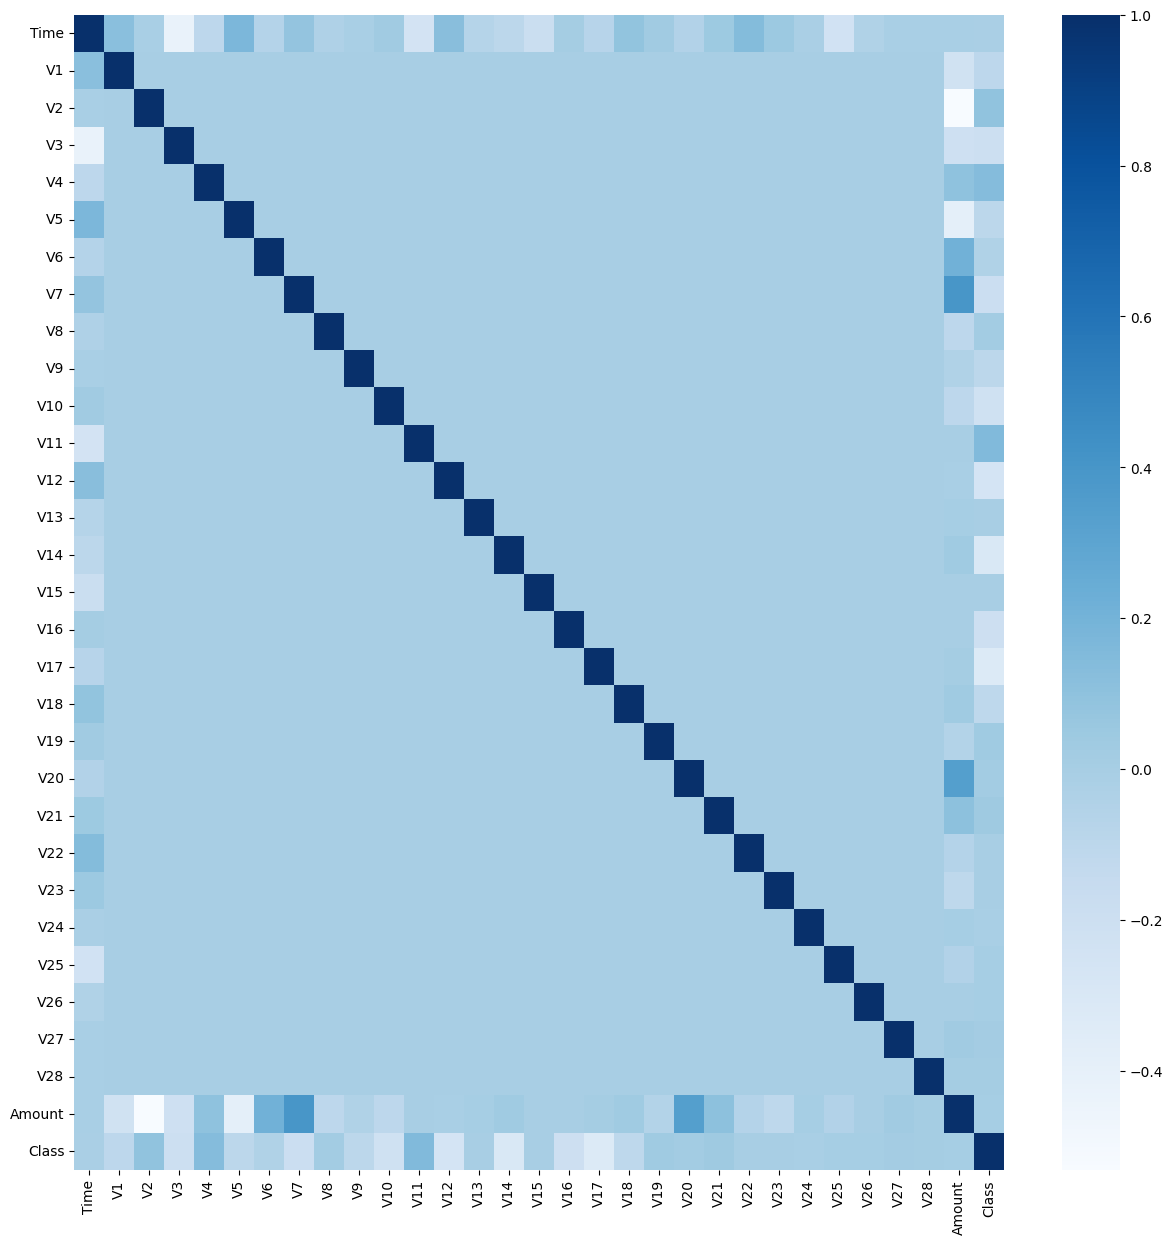

In [12]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap = "Blues")
plt.show()

In [13]:
print(data_SM.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.743426
V11       0.719303
V2        0.528834
V19       0.295361
V20       0.178921
V21       0.140611
V28       0.100117
V27       0.085288
V26       0.063580
V8        0.057679
V25       0.043334
Amount    0.033767
V23      -0.005717
V22      -0.007434
V13      -0.047573
V15      -0.056303
V24      -0.100775
Time     -0.146316
V5       -0.395524
V6       -0.423675
V1       -0.456564
V18      -0.498521
V7       -0.515126
V17      -0.593438
V3       -0.595537
V9       -0.600132
V16      -0.629036
V10      -0.661573
V12      -0.711783
V14      -0.788147
Name: Class, dtype: float64


In [14]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("Class",axis=1)
target = data["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(X_SM,Y_SM,test_size=0.20,random_state=0)

In [15]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 30) (454904,) (113726, 30) (113726,)


In [51]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 206.79902172088623
Training Accuracy Score: 1.0
Pred Time: 0.8057940006256104
Testing Accuracy Score: 0.9998856901675958
AUC Score: 0.9998854100557084
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [52]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 26.231626987457275
Training Accuracy Score: 1.0
Pred Time: 0.016894817352294922
Testing Accuracy Score: 0.9984875929866521
AUC Score: 0.998486208299665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [53]:
#LDA
lda = LinearDiscriminantAnalysis()
st=time.time()
lda.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lda=lda.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lda)))
st=time.time()
Y_pred_lda = lda.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lda)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lda,average='weighted')))
print(classification_report(Y_test,Y_pred_lda))

Training Time: 1.316802740097046
Training Accuracy Score: 0.9327088792360586
Pred Time: 0.010579824447631836
Testing Accuracy Score: 0.9327770254822996
AUC Score: 0.9329129635681636
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56724
           1       0.99      0.88      0.93     57002

    accuracy                           0.93    113726
   macro avg       0.94      0.93      0.93    113726
weighted avg       0.94      0.93      0.93    113726



In [54]:
#Logistic Regression
lr = LogisticRegression()
st=time.time()
lr.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_lr=lr.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_lr)))
st=time.time()
Y_pred_lr = lr.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_lr)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_lr,average='weighted')))
print(classification_report(Y_test,Y_pred_lr))

Training Time: 3.031424045562744
Training Accuracy Score: 0.9721193922234141
Pred Time: 0.006412029266357422
Testing Accuracy Score: 0.9722402968538417
AUC Score: 0.9722591106423643
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56724
           1       0.98      0.96      0.97     57002

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [55]:
#Naive Bayes Classifier
nb = GaussianNB()
st=time.time()
nb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_nb=nb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_nb)))
st=time.time()
Y_pred_nb = nb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_nb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_nb,average='weighted')))
print(classification_report(Y_test,Y_pred_nb))

Training Time: 0.13635516166687012
Training Accuracy Score: 0.8681304187257092
Pred time: 0.01990199089050293
Testing Accuracy Score: 0.8680512811494293
AUC Score: 0.8683541673490793
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56724
           1       0.99      0.74      0.85     57002

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.87    113726



In [56]:
#AdaBoost Classifier
abc = AdaBoostClassifier()
st=time.time()
abc.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_abc=abc.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_abc)))
st=time.time()
Y_pred_abc = abc.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_abc)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_abc,average='weighted')))
print(classification_report(Y_test,Y_pred_abc))

Training Time: 72.6578278541565
Training Accuracy Score: 0.9810179730228795
Pred time: 0.327070951461792
Testing Accuracy Score: 0.9808750857323743
AUC Score: 0.9808898241689917
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     56724
           1       0.99      0.97      0.98     57002

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [57]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 31.918141841888428
Training Accuracy Score: 1.0
Pred time: 0.04315185546875
Testing Accuracy Score: 0.9998768971035648
AUC Score: 0.999876595444609
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



##Feature Selection

In [19]:
#Correlation of all the features in dataset with respect to 'Class'
print(data_SM.corr()["Class"].sort_values(ascending=False))

Class     1.000000
V4        0.743426
V11       0.719303
V2        0.528834
V19       0.295361
V20       0.178921
V21       0.140611
V28       0.100117
V27       0.085288
V26       0.063580
V8        0.057679
V25       0.043334
Amount    0.033767
V23      -0.005717
V22      -0.007434
V13      -0.047573
V15      -0.056303
V24      -0.100775
Time     -0.146316
V5       -0.395524
V6       -0.423675
V1       -0.456564
V18      -0.498521
V7       -0.515126
V17      -0.593438
V3       -0.595537
V9       -0.600132
V16      -0.629036
V10      -0.661573
V12      -0.711783
V14      -0.788147
Name: Class, dtype: float64


In [20]:
print(data_SM.corr()["Class"].abs().sort_values(ascending=False))

Class     1.000000
V14       0.788147
V4        0.743426
V11       0.719303
V12       0.711783
V10       0.661573
V16       0.629036
V9        0.600132
V3        0.595537
V17       0.593438
V2        0.528834
V7        0.515126
V18       0.498521
V1        0.456564
V6        0.423675
V5        0.395524
V19       0.295361
V20       0.178921
Time      0.146316
V21       0.140611
V24       0.100775
V28       0.100117
V27       0.085288
V26       0.063580
V8        0.057679
V15       0.056303
V13       0.047573
V25       0.043334
Amount    0.033767
V22       0.007434
V23       0.005717
Name: Class, dtype: float64


In [21]:
#DecisionTreeClassifier Feature Selection
dt = DecisionTreeClassifier()
dt.fit(X_SM,Y_SM)

DecisionTreeClassifier()

In [22]:
feat_imp=pd.Series(dt.feature_importances_, index=data.columns[0:30])

In [23]:
#Feature Importance by DesicionTreeClassifier
for i in range(len(dt.feature_importances_)):
	print('Feature %d: %f' % (i, dt.feature_importances_[i]))

Feature 0: 0.007711
Feature 1: 0.006124
Feature 2: 0.001199
Feature 3: 0.007083
Feature 4: 0.046400
Feature 5: 0.000918
Feature 6: 0.001691
Feature 7: 0.001716
Feature 8: 0.005154
Feature 9: 0.000680
Feature 10: 0.008993
Feature 11: 0.004301
Feature 12: 0.020529
Feature 13: 0.007735
Feature 14: 0.811204
Feature 15: 0.005059
Feature 16: 0.002999
Feature 17: 0.030873
Feature 18: 0.004380
Feature 19: 0.002357
Feature 20: 0.001757
Feature 21: 0.004457
Feature 22: 0.001993
Feature 23: 0.003062
Feature 24: 0.000885
Feature 25: 0.002647
Feature 26: 0.002064
Feature 27: 0.001306
Feature 28: 0.000251
Feature 29: 0.004470


<AxesSubplot: title={'center': 'DecisionTreeClassifier Feature Selection'}>

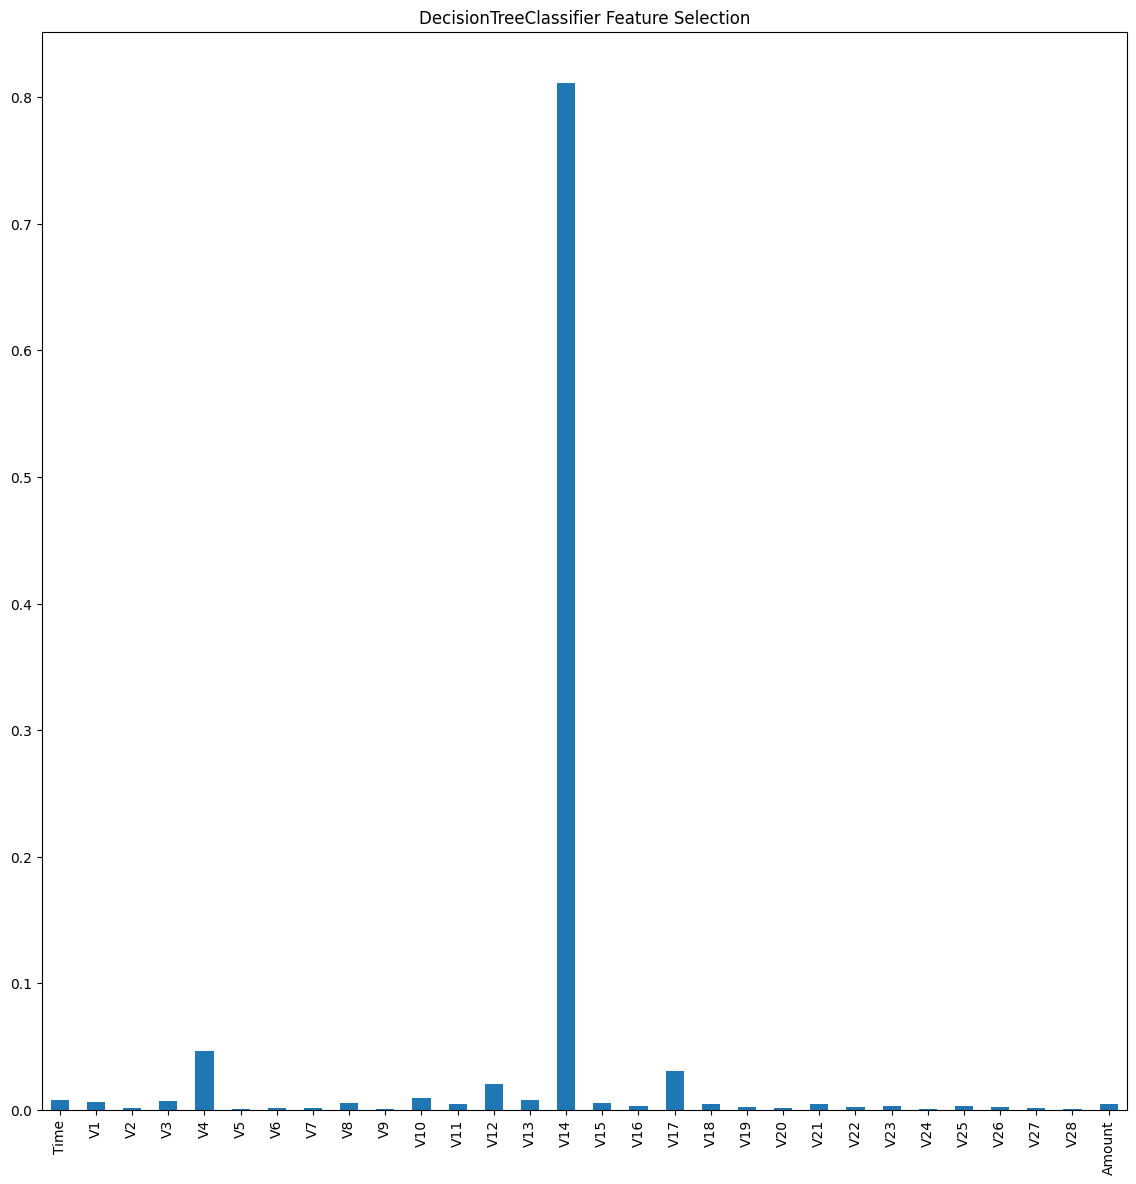

In [24]:
#Plot of feature Importance by DecisionTreeClassifier
feat_imp.plot(kind='bar',figsize=(14,14),title='DecisionTreeClassifier Feature Selection')

In [25]:
#ANOVA Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
X_selected = fs.fit_transform(X_SM, Y_SM)

In [26]:
# Feature Scores by ANOVA Feature Selection
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 12439.747168
Feature 1: 149745.770167
Feature 2: 220766.254752
Feature 3: 312507.256149
Feature 4: 702566.782959
Feature 5: 105452.743560
Feature 6: 124398.474286
Feature 7: 205389.669061
Feature 8: 1898.072565
Feature 9: 320073.821507
Feature 10: 442588.884129
Feature 11: 609623.872513
Feature 12: 583921.337343
Feature 13: 1289.815448
Feature 14: 932404.742324
Feature 15: 1808.279514
Feature 16: 372320.657746
Feature 17: 309112.527692
Feature 18: 188052.268410
Feature 19: 54347.164566
Feature 20: 18805.378246
Feature 21: 11469.362512
Feature 22: 31.428493
Feature 23: 18.587956
Feature 24: 5834.046636
Feature 25: 1069.811744
Feature 26: 2307.949928
Feature 27: 4166.573966
Feature 28: 5757.355438
Feature 29: 649.112181


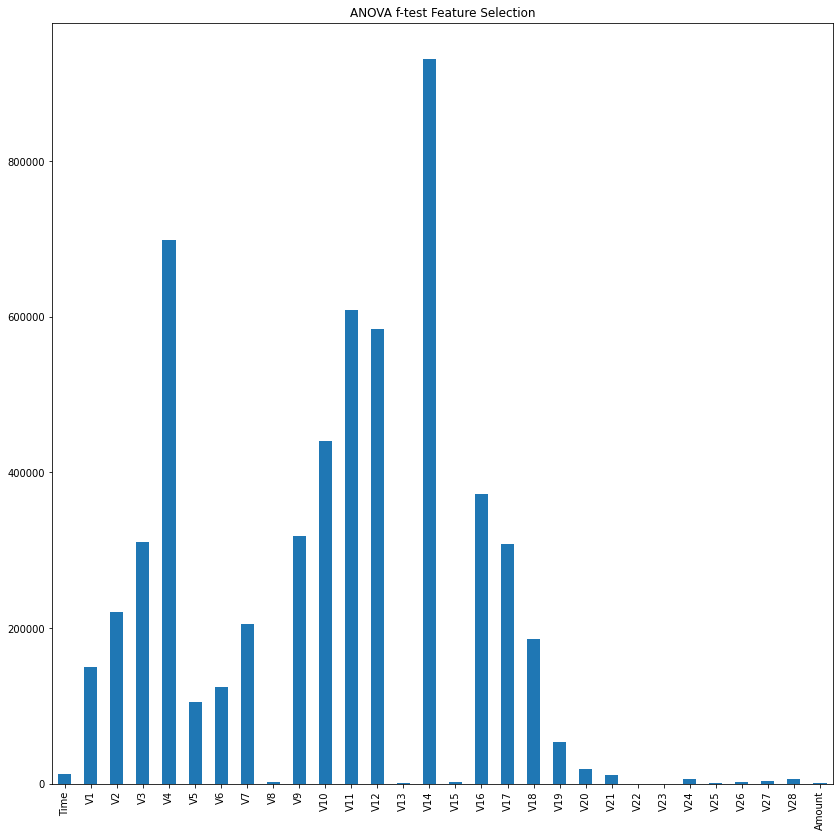

In [36]:
feat_imp_anova=pd.Series(fs.scores_, index=data.columns[0:30])
feat_imp_anova.plot(kind='bar',figsize=(14,14),title='ANOVA f-test Feature Selection')

In [27]:
#Top features according to ANOVA f-test Feature Selection
selector = SelectKBest(f_classif, k=23)
X_reduced = selector.fit_transform(X_SM,Y_SM)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_SM.iloc[:,cols].columns.tolist()
selected_columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V26',
 'V27',
 'V28']

In [28]:
#Mutual Information Classification Feature Selection
from sklearn.feature_selection import mutual_info_classif as MIC
mic_score = MIC(X_SM,Y_SM)
# Feature Scores by MIC Feature Selection
for i in range(len(mic_score)):
	print('Feature %d: %f' % (i, mic_score[i]))

Feature 0: 0.282143
Feature 1: 0.230806
Feature 2: 0.303841
Feature 3: 0.403572
Feature 4: 0.442240
Feature 5: 0.164766
Feature 6: 0.195818
Feature 7: 0.327415
Feature 8: 0.172374
Feature 9: 0.287490
Feature 10: 0.479196
Feature 11: 0.430175
Feature 12: 0.474384
Feature 13: 0.025165
Feature 14: 0.542485
Feature 15: 0.027034
Feature 16: 0.357889
Feature 17: 0.445226
Feature 18: 0.219508
Feature 19: 0.110460
Feature 20: 0.122968
Feature 21: 0.243416
Feature 22: 0.036908
Feature 23: 0.070795
Feature 24: 0.070779
Feature 25: 0.038954
Feature 26: 0.059429
Feature 27: 0.251795
Feature 28: 0.188421
Feature 29: 0.419130


<AxesSubplot: title={'center': 'Mutual Information Classification Feature Selection'}>

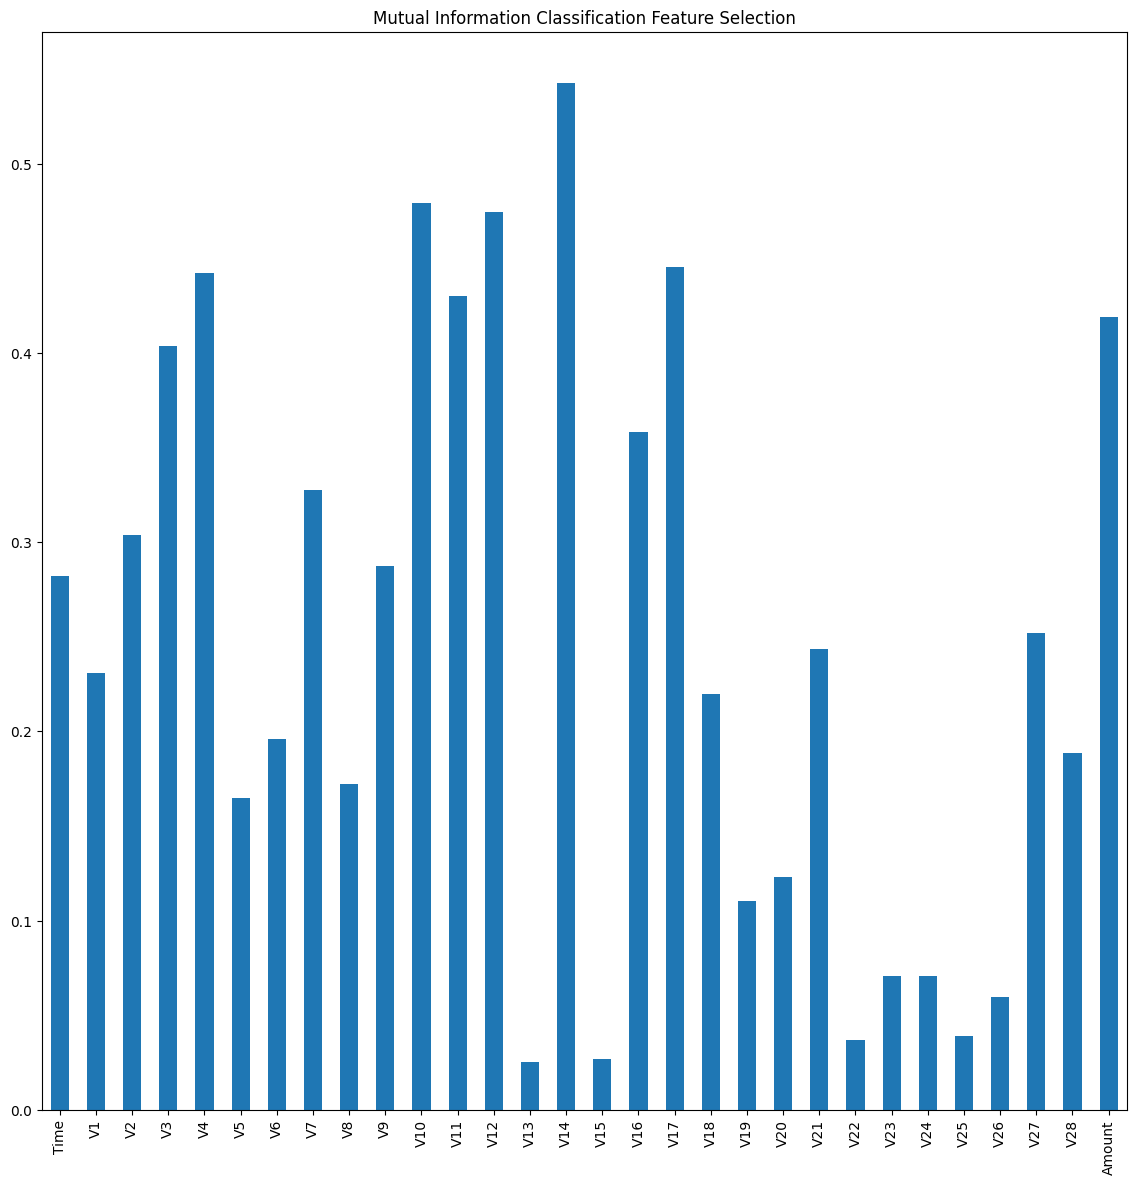

In [29]:
feat_imp_mic=pd.Series(mic_score, index=data.columns[0:30])
feat_imp_mic.plot(kind='bar',figsize=(14,14),title='Mutual Information Classification Feature Selection')

In [30]:
#Top features according to Mutual Information Classification Feature Selection
selector = SelectKBest(MIC, k=23)
X_reduced = selector.fit_transform(X_SM,Y_SM)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_SM.iloc[:,cols].columns.tolist()
selected_columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V27',
 'V28',
 'Amount']

In [31]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe=RFE(estimator=dt)
rfe.fit(X_SM,Y_SM)
for i in range(X.shape[1]):
  print("Column: %d, Selected %s, Rank: %.1f"%(i,rfe.support_[i],rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.0
Column: 1, Selected True, Rank: 1.0
Column: 2, Selected False, Rank: 13.0
Column: 3, Selected True, Rank: 1.0
Column: 4, Selected True, Rank: 1.0
Column: 5, Selected False, Rank: 15.0
Column: 6, Selected False, Rank: 7.0
Column: 7, Selected False, Rank: 10.0
Column: 8, Selected True, Rank: 1.0
Column: 9, Selected False, Rank: 11.0
Column: 10, Selected True, Rank: 1.0
Column: 11, Selected True, Rank: 1.0
Column: 12, Selected True, Rank: 1.0
Column: 13, Selected True, Rank: 1.0
Column: 14, Selected True, Rank: 1.0
Column: 15, Selected True, Rank: 1.0
Column: 16, Selected False, Rank: 3.0
Column: 17, Selected True, Rank: 1.0
Column: 18, Selected True, Rank: 1.0
Column: 19, Selected False, Rank: 6.0
Column: 20, Selected False, Rank: 8.0
Column: 21, Selected False, Rank: 2.0
Column: 22, Selected False, Rank: 9.0
Column: 23, Selected False, Rank: 4.0
Column: 24, Selected False, Rank: 14.0
Column: 25, Selected True, Rank: 1.0
Column: 26, Selected False, Ran

In [32]:
#Recursive Feature Elimination Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=dt)
rfecv.fit(X_SM,Y_SM)
for i in range(X_train.shape[1]):
  print("Column: %d, Selected %s, Rank: %.1f"%(i,rfecv.support_[i],rfecv.ranking_[i]))

Column: 0, Selected False, Rank: 2.0
Column: 1, Selected False, Rank: 6.0
Column: 2, Selected False, Rank: 26.0
Column: 3, Selected False, Rank: 7.0
Column: 4, Selected False, Rank: 3.0
Column: 5, Selected False, Rank: 29.0
Column: 6, Selected False, Rank: 21.0
Column: 7, Selected False, Rank: 24.0
Column: 8, Selected False, Rank: 10.0
Column: 9, Selected False, Rank: 27.0
Column: 10, Selected False, Rank: 8.0
Column: 11, Selected False, Rank: 11.0
Column: 12, Selected False, Rank: 5.0
Column: 13, Selected False, Rank: 9.0
Column: 14, Selected True, Rank: 1.0
Column: 15, Selected False, Rank: 14.0
Column: 16, Selected False, Rank: 17.0
Column: 17, Selected False, Rank: 4.0
Column: 18, Selected False, Rank: 13.0
Column: 19, Selected False, Rank: 19.0
Column: 20, Selected False, Rank: 22.0
Column: 21, Selected False, Rank: 16.0
Column: 22, Selected False, Rank: 23.0
Column: 23, Selected False, Rank: 18.0
Column: 24, Selected False, Rank: 28.0
Column: 25, Selected False, Rank: 15.0
Column

In [59]:
data_final = data_SM.drop(['V5','V9','V22','V24','V27','V28'], axis=1)

In [60]:
print(data_final.shape)

(568630, 25)


In [61]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data_final.drop("Class",axis=1)
target = data_final["Class"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [62]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454904, 24) (454904,) (113726, 24) (113726,)


In [63]:
#Random Forest
rf = RandomForestClassifier()
st=time.time()
rf.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_rf=rf.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_rf)))
st=time.time()
Y_pred_rf = rf.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_rf)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_rf,average='weighted')))
print(classification_report(Y_test,Y_pred_rf))

Training Time: 162.4424660205841
Training Accuracy Score: 1.0
Pred Time: 0.7240381240844727
Testing Accuracy Score: 0.9998856901675958
AUC Score: 0.9998854100557084
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [64]:
#Decision Tree
dt = DecisionTreeClassifier()
st=time.time()
dt.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_dt=dt.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_dt)))
st=time.time()
Y_pred_dt = dt.predict(X_test)
et=time.time()
print("Pred Time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_dt)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_dt,average='weighted')))
print(classification_report(Y_test,Y_pred_dt))

Training Time: 20.673271894454956
Training Accuracy Score: 1.0
Pred Time: 0.018831968307495117
Testing Accuracy Score: 0.9983029386419991
AUC Score: 0.9983013594008844
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [65]:
#XGBoost Classifier
import xgboost
xgb = xgboost.XGBClassifier(objective="binary:logistic")
st=time.time()
xgb.fit(X_train,Y_train)
et=time.time()
print("Training Time:",et-st)
Y_trainpred_xgb=xgb.predict(X_train)
print("Training Accuracy Score: {}".format(accuracy_score(Y_train,Y_trainpred_xgb)))
st=time.time()
Y_pred_xgb = xgb.predict(X_test)
et=time.time()
print("Pred time:",et-st)
print("Testing Accuracy Score: {}".format(accuracy_score(Y_test,Y_pred_xgb)))
print('AUC Score: {}'.format(roc_auc_score(Y_test,Y_pred_xgb,average='weighted')))
print(classification_report(Y_test,Y_pred_xgb))

Training Time: 24.917330265045166
Training Accuracy Score: 1.0
Pred time: 0.03962588310241699
Testing Accuracy Score: 0.9998593109755025
AUC Score: 0.9998589662224103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56724
           1       1.00      1.00      1.00     57002

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [66]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test,Y_pred_rf)
cm_dt = confusion_matrix(Y_test,Y_pred_dt)
cm_xgb = confusion_matrix(Y_test,Y_pred_xgb)

<AxesSubplot: title={'center': 'XGBoost Classifier Confusion Matrix'}>

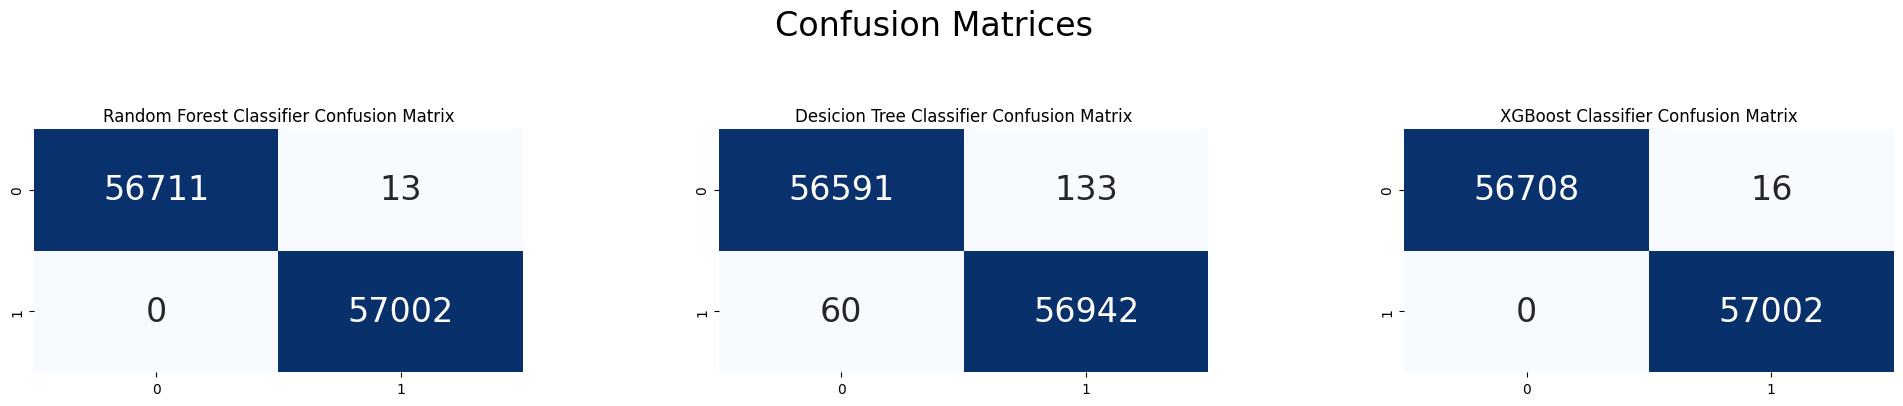

In [67]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Desicion Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("XGBoost Classifier Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})